<img src="./img/vi_logo.png" style="float: left; margin: 10px; height: 45px">

# Vertical Institute Data Science 101
# Lesson 6: Classification Models

---



### Learning Objectives

#### Part 1: KNearest Neighbors
**After this lesson, you will be able to:**
- Define what classification models are
- Understand KNN algorithm
- Apply KNN to Iris dataset

#### Part 2: Logistic Regression
**After this lesson, you will be able to:**
- Understand Logistic regression algorithm
- Apply Logistic Regression to Wine dataset

#### Part 3: Decision Trees and Random Forest Classification
- Understand Decision Trees
- Apply decision tree model to Loan Approval dataset
- Understand Random Forest Classifier
- Apply Random Forest Classifier to dataset


## Part 1: KNearest Neighbors - First Model

### What is Classification?
- used to predict which class a data point is part of (discrete value)

<img src="img/scikit.png" style="height: 600px">

<a id= "knn"></a>
### Introduction to KNN

- *non-parametric, lazy learning algorithm* that predicts outcomes based on the similarity (nearness) of inputted features to the training set


- __Non-parametric__: does not make assumptions about the underlying distribution of our data
- __Lazy__: training phase is minimal - KNN uses all (or nearly all) of the training data
- __Based on feature similarity__: how closely out-of-sample features resemble our training set determines how we classify a given data point

<img src="img/knn.png" style="margin: 20px; height: 400px">

<a id = "adv"></a>
### Advantages and Drawbacks of KNN

***Benefits***
- Simple to understand and explain
- Model training is fast
- Can be used for classification and regression


***Drawbacks***

- Must store all of the training data
- Prediction phase can be slow when n is large
- Sensitive to irrelevant features
- Sensitive to the scale of the data
- Accuracy is (generally) not competitive with other supervised learning models

## Using a Bank customer churn dataset

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. Let's explore it together.

In [ ]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#import KNN
from sklearn.______ import _______________

In [ ]:
data = pd.read_csv("./assets/Churn_Modelling.csv")
data.head()

In [ ]:
# Assign your data and target
X = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = data['Exited']

In [ ]:
# Same few steps as before!
# 1. Initialize KNN
model = _______________()

# 2. fit data
model.fit(_, _)

# 3. predict the response values for the observations in X ("test the model")
y_pred_class = model.predict(_)
y_pred_class

### Accuracy score 

In [ ]:
# compute classification accuracy
from sklearn.metrics import accuracy_score

accuracy_score(__, ___________)

***What can we observe from the above accuracy? Is it considered as good or bad?***

### Train Test Split

To evaluate our model accurately, we always need to split our data into a **training set** and **testing set**.

The training set is the data we use to fit our model, but our model should never see the data from the testing set at this stage.

Only after the model is trained, we see how well the model predicts the target from the testing set.

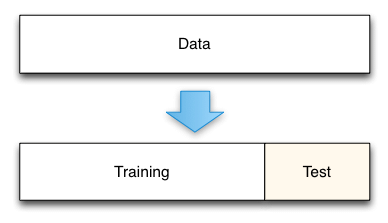

In [ ]:
#Train, test, split
from sklearn.model_selection import __________


In [ ]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
# Split X into X_train and X_test
# Split y into y_train and y_test
# All in one shot using one function!

X_train, X_test, y_train, y_test = ___________(_, _, random_state=99)

In [ ]:
# STEP 2: train the model on the training set (using K=1)
knn = ______________(n_neighbors = 1)
knn.fit(______, ______)

In [ ]:
# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = ___.predict(______)

# Checking out the accuracy metric for this model
print(accuracy_score(y_test, y_pred_class))

In [ ]:
# Let's build a new model and see the performance!
# KNN with 50 neighbors
# Same few steps!

knn = KNeighborsClassifier(n_neighbors=__) # fill in the argument

knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)

print(accuracy_score(y_test, y_pred_class))


In [ ]:
# Let's build a new model and see the performance!
# KNN with 64 neighbors
# Same few steps!

knn = KNeighborsClassifier(n_neighbors=__) # fill in the argument

knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)

print(accuracy_score(y_test, y_pred_class))


### In class Exercise 1:
- Run the KNeighborsClassifer for a range of 2, 4, ... 20
- Visualize n_neighbors on x-axis and test-set accuracy on y-axis
- Use KNN on the loan-approval dataset (train_test_split and using numeric variables in X `df.select_dtypes('number')`
- Target Column is `Loan_Status`

In [ ]:
# import packages and functions again just in case
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

loan = pd.read_csv('assets/loan-approval.csv')
# Some preprocessing: mapping Y to 1, N to 0
loan['Loan_Status'] = loan['Loan_Status'].map({'Y':1,"N":0}) 

loan.head()

In [ ]:
loan.info()

In [ ]:
y = loan['_________']
X = loan[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]

X = X.fillna(X.mean()) # fill missing values with mean

# Step 1: Train test split
X_train, X_test, y_train, y_test = ___________(X, y, random_state = 42)

scores = []

# Running a loop to change the K
# In every iteration, we are building a new model with a different K and storing the results!
for k in range(2,20+1,2):

    knn = _____________(n_neighbors=k) # Step 2: Create the model object
    
    knn.fit(______, ______) # Step 3: Train the model
    
    y_pred_class = knn.predict(_____) # Step 4: Make prediction on test data
    
    scores.append(accuracy_score(y_test, _______)) # Step 5: Evaluate using accuracy
    
    
plt.plot(scores)
plt.xticks(ticks=range(10),labels=range(2,20+1,2))
plt.xlabel('n_neighbors')
plt.ylabel('Test set Accuracy')

## Second Model -  Logistic Regression
- Arguably the most popular classification algorithm. Today we'll learn how it works and practice using it.

### A (brief) review of regression models

To understand how logistic regression works, we'll start with a refresher on standard regression. A regression with one predictor, **x1**, predicting **y** can be specified as:

### $$E[y] = \beta_0 + \sum_{i}^N\beta_ix_i$$

Where:
- **`E[y]`** is the expected value (mean) of y
- **`i through N`** are the observations (rows) of the data
- **`beta_0`** is the intercept
- **`beta_i`** is the coefficient for the predictor **`x_i`**

### We will be using the same **Bank Customer Churn dataset** to learn about the new model

In [ ]:
# if you need to reload the data again
data = pd.read_csv("./assets/Churn_Modelling.csv")
data.head()

In [ ]:
data.describe()

#### "Normalize" the non-target columns

**Normalization** in this case means subtracting the column means and dividing by the column standard deviations.

- The **`.mean()`** DataFrame function can calculate the column means
- The **`.std()`** DataFrame function can calculate the column standard deviations

In [ ]:
# split data into X and y

X = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = data['Exited']

In [ ]:
# BEFORE Normalization
print(X.mean()) # Different mean
print(X.std()) # Wildly different standard deviations

# Some models like logistics regression don't like this

In [ ]:
# AFTER Normalization
X_standardized = (X - X.mean()) / X.std()

print(X_standardized.mean()) # The column mean are all 0 (very close to zero) now!
print(X_standardized.std()) # The standard deviation are all 1!

### What is logistic regression?

As the name implies, logistic regression is also a regression. There is still an intercept and coefficients multiplied by each predictor. 

In the case of logistic regression, however, the target variable is **categorical** as is the case in all classification problems, and therefore the regression is solving for the **probability of classes in the target variable** rather than the mean value of the target variable.

<a id="th1"></a>
###  In class Exercise 2: Logistic Regression 

Using the wine dataset, finish the code below and train a model to determine if the wine is red or white. Use the comments to guide you through the steps of creating a model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.________ import ______________

# initialize Xs and y
X = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = data['Exited']

# initialize logistic regression model
logreg = _______________()

# train test split
______, X_test, _____, y_test = _________(X, y, random_state=0)

# fit X_train and y_train
logreg.fit(_______, _______)

# use model to predict X_test
y_pred = logreg.predict(______)

# compare predictions to y_test
print('Accuracy: ', accuracy_score(y_test, y_pred))

### What if we used the standardised X instead? Is the accuracy better? YES!

In [ ]:
# initialize logistic regression model
logreg = LogisticRegression()

# train test split
# Use X_standardized instead of X
X_train, X_test, y_train, y_test = train_test_split(_________, y, random_state=0)  

# fit X_train and y_train
logreg.fit(X_train, y_train)

# use model to predict X_test
y_pred = logreg.predict(X_test)

# compare predictions to y_test
print('Accuracy: ', accuracy_score(y_test, y_pred))

## Model 3: Decision Trees

- Visual Introduction: http://www.r2d3.us/visual-intro-to-machine-learning-part-1/ 

### Decision Trees
- machine learning model that develops a series of yes or no rules to explain the differences present in the outcome variable
- non-parametric, hierarchical classification and regression technique

    1. Root - starting point of the decision tree
    2. Nodes - subsequent branching points
    3. Leaves - nodes that do not split any further

<img src="img/dt.jpg" style="margin: 20px; height: 350px">

#### Elements of Decision Trees
1. __Greedy__ - algorithm makes locally optimal decision at each step
2. __Recursive__ - splits tasks into subtasks, solves each in the same way
3. __Local optimum__ - solution for a given neighborhood of points

#### Types of Splits:

1. Entropy 
2. Gini Index

___
- Both are ways to calculate information gain
- Since the entropy/gini before splitting is the same for any split, it can be left out during information gain calculation

### Using the same Churn_Modelling.csv dataset

- We are going to test the new model to see the performance

In [ ]:
# Import the model 
from sklearn.tree import DecisionTreeClassifier

# Just in case you haven't load the data
data = pd.read_csv("./assets/Churn_Modelling.csv")
X = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = data['Exited']


In [ ]:
# Initialize decision tree model
tree = ______________(max_depth = 2)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# fit X_train and y_train
tree.fit(X_train, y_train)

# use model to predict X_test
y_pred = tree.predict(X_test)

# compare predictions to y_test
print('Accuracy: ', accuracy_score(y_test, y_pred))

### We normally tune the `max_depth` hyper-parameter in a decision tree model

In [ ]:
# creating a dictionary to hold the results
scores = {}

# looping through 2 to 18
# we are building an entirely new model in each iteration
for depth in range(2, 18+1, 4):
    
    tree = DecisionTreeClassifier(max_depth = _____) # we are using depth which changes every iteration
    
    tree.fit(X_train, y_train)

    y_preds = tree.predict(X_test)
    
    # store the accuracy in the dictionary
    scores[depth] = accuracy_score(y_test,y_preds) 

score_table = pd.Series(data=scores)
score_table
    

<a id="advdt"></a>
### Advantages and Disadvantages of Decision Trees

***Advantages***
- Decisions are easy to understand and interpret
- Weight and importance of each feature becomes clear
- Numerical and categorical features can be used naturally
- Trees are a natural multi-class classifier

***Disadvantages***
- Overfit to training data with complex trees
- Small changes in input data can result in totally different trees
- Can make mistakes with unbalanced classes
- Requires large datasets to build robust rules

## Performance Metrics for Classification models

<img src="img/confusion.jpeg" style="height: 600px">
<img src="img/confusion.png" style="height: 550px">

- **Recall** (Sensitivity)
- **Precision**
- **F1** (Harmonic mean of Precision and Recall)

$$precision=\frac{TP}{TP+FP};$$

$$recall=\frac{TP}{TP+FN};$$

$$F_1=2.\: \frac{precision\: .\: recall}{precision+recall}$$

### Which metric do you care about?
- **Precision** if cost of False Positives are high
- **Recall** if cost of False Negatives are high 

In [ ]:
from sklearn.metrics import ___________
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ___________(y_test, y_preds) # calculate

cm_display = ConfusionMatrixDisplay(cm).plot() # visualize in a nicer format

#### Using the Recall formula, what is the value of recall in this example?  
#### Using the Precision formula, what is the value of precision in this example?  
#### Using the F1 formula, what is the value of F1 in this example?     

## Receiver operating characteristic curve (ROC) (Bonus!)
- A plot of false positive rate on x against true positive rate on y
- Area under curve goes from 0.5 (random model) to 1 (ideal), although a worst than random model (<0.5) is possible

In [ ]:
from sklearn.metrics import ________, ________
from sklearn.metrics import RocCurveDisplay

# Compute the predictions. Getting the probability of True class
y_score = tree.predict_proba(X_test)[:,1]
print(y_score) 

# the roc_curve function can give you the false positive rate and true positive rate
fpr, tpr, _ = ______(y_test, y_score, pos_label = tree.classes_[1])

# with the FPR and TPR, we can plot the ROC curve
roc_display = _____________(fpr = fpr, tpr = tpr).plot()

# note roc uses .predict_proba(), the unthresholded probabilities. 
# Code won't error with .predict() (less granular values default threholded at 0.5) but is theoretically wrong

# Computing the AUC score
print('AUC score: ', ___________(y_test, y_score)) 


<a name="conclusion"></a>
## Lesson Summary


Let's review what we learned today. We:

- Conducted statistical modelling of different datasets to derive solutions
- Walk-through of several classification models: KNN, Logistic Regression, Decision Trees and Random Forest Classifier
- Identify which models would churn good results based on the characteristics and process of the algorithms
- Used scikit learn package to perform advanced computational methods

# Readings
- Visual Intro to Decision Trees: http://www.r2d3.us/visual-intro-to-machine-learning-part-1/
- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
- Playground to learn models: https://ml-playground.com
- Data Leakage: https://www.kaggle.com/alexisbcook/data-leakage
- ROC/Precision-Recall details
    - https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
    - https://www.kaggle.com/lct14558/imbalanced-data-why-you-should-not-use-roc-curve